## Dlaczego Julia

W trakcie kursu pracować będziemy w języku [Julia](https://julialang.org/). Dlaczego?

- Język skryptowy (jak Python  czy R)
- Szybkość  (jak C)
- Silny  system typów 
- Wbudowane  zrównoleglanie  obliczeń
- Łatwość  integracji  integracji (Python, R, C, …) 


# Metody Regularyzacji

Zacznijmy od prostego przykładu. Oszacujmy regresję przebiegającą przez 2 punkty: 

In [3]:
using PyPlot

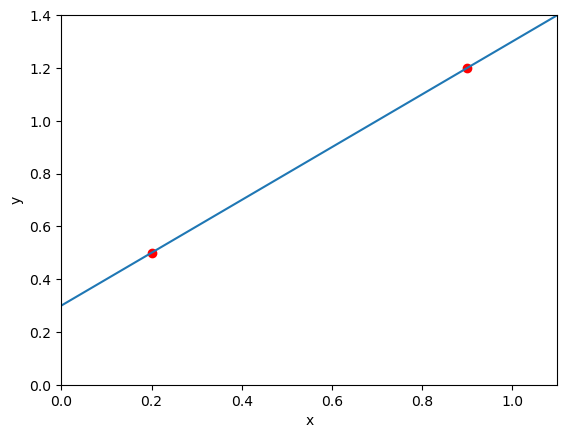

PyObject <matplotlib.collections.PathCollection object at 0x000000004923B1C0>

In [4]:
x = [0.2,0.9]
y = [0.5, 1.2]

function least_squares(X::Array{Float64},
    y::Array{Float64} , intercept::Bool = true)
    intercept ? (X = hcat(X, ones(size(X)[1]))) : X = X
    return (X'*X)^-1*X'*y
end

β  = least_squares(x,y)

fig = figure();
xlabel("x")
ylabel("y")
ax = gca()
ax.set_xlim([0.0,1.1])
ax.set_ylim([0.0,1.4])

X = -2.0:0.1:2.0
plot(X, β[1] * X .+β[2])

scatter(x,y, color = "Red", label = "Train")


Dodajmy do modelu kolejne punkty (zbiór testowy):

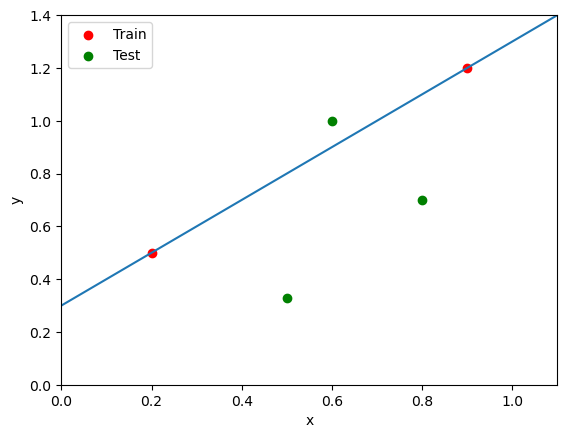

In [5]:
xt = [0.5, 0.6, 0.8]
yt = [0.33, 1.0, 0.7]
ax.scatter(xt,yt, color = "Green", label="Test");
ax.legend()
fig

Jak widzimy powyżej regresja oszacowana w tradycyjny sposób:

$$\hat{\beta} = (X^TX)^{-1}X^Ty $$

charakteryzuje się tym, że wyznacza prostą idealnie dopasowaną do danych na których jest uczona. Nachylenie krzywej zawsze będzie odpowiadało prostej, która minimalizuje błąd średniokwadratowy na dostępnych danych trenujących:

$$\hat{\beta} = \underset{\beta}{\operatorname{argmin}}{\sum_{i=1}^n(y_i - \beta_0 - \sum_{j-1}^k x_{ij}\beta_j)^2}$$

W przypadku dowolnego problemu predykcyjnego (klasyfikacyjnego) może być to problemem, w rezultacie możemy otrzymać model, który nie generalizuje w odpowiednim stopniu i którego błąd na danych testowych jest zbyt wysoki. Przeciwdziałać temu możemy za pomocą odpowiedniej metody <b>regularyzacji</b>.


## Regresja Grzbietowa

<b>Regresja grzbietowa</b> (znana też jako regularyzacja <b>$L_2$</b> lub regularyzacja <b>Tichonowa</b>) jest metodą polegającą na kotroli wielkości parametrów $\hat{\beta}$ poprzez nałożenie kary $\lambda$ na resztową sumę kwadratów (<b>RSS</b>, ang. <i>residual sum of squares</i>):

$$\hat{\beta}^{ridge} = \underset{\beta}{\operatorname{argmin}}\{\sum_{i=1}^n(y_i - \beta_0 - \sum_{j-1}^k x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^k \beta_j^2\}$$

gdzie $\lambda$ kontroluje wielkość kurczenia parametrów. Regresję grzbietową możemy zapisać też jako problem optymalizacyjny:

$$\hat{\beta}^{ridge} = \underset{\beta}{\operatorname{argmin}}{\sum_{i=1}^n(y_i - \beta_0 - \sum_{j-1}^k x_{ij}\beta_j)^2}$$

$$p.w. \sum_{j=1}^k\beta_j^2 \leq \delta$$

<b>Uwagi:</b>
- Wyraz wolny $\beta_0$ jest wyłączony z procesu regularyzacji. Ze względu na postać zagadnienia dodanie stałej $c$ do oszacowania $\hat{y_i}$ nie byłoby takie same dla każdego $i$. 
- Aby procedura była poprawna i dawała odpowiednie wyniki zmienne muszą być znormalizowane.

Rozwiązanie regresji grzbietowej możemy prosto znaleźć za pomocą równania:

$$\hat{\beta}^{ridge} = (X^TX + \lambda I)^{-1}X^Ty $$

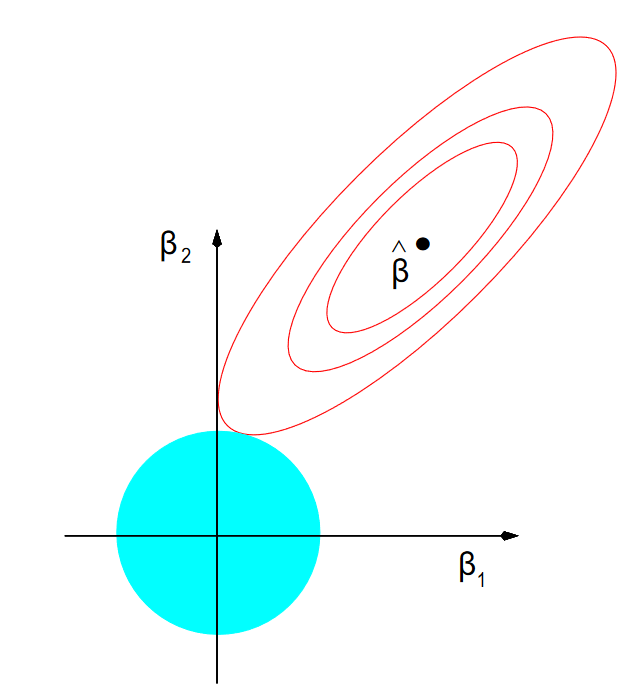

Pomimo tego, że regresja grzbietowa spełnia swoją rolę jako metoda regularyzacji posiada kilka wyraźnych wad:
- Przez to jaka metryka jest wykorzystana do nałożenia kary na parametry będą one maleć wraz ze wzrostem kary $\lambda$ lecz nigdy nie osiągną wartości 0;
- oznacza to, że model w ten sposób regularyzowany będzie zawierał wszystkie przyjęte z góry predyktory przez co model straci na interpretowalności;
- ponadto sposób nakładania kar utrudnia przeprowadzenie niektórych testow statystycznych;
- Ostatnią wyraźną wadą tej metody jest fakt, że oszacowania współczynników $\hat{\beta}$ spadają <b>proporcjonalnie</b> wraz ze wzrostem $\lambda$. Oznacza to, że kara nakładana na zmienne o wysokim współczynniku ("ważne" z punktu widzenia oszacowania modelu) będzie większa niz na zmienne, których wartość parametru $\hat{\beta}_i$ jest niższa.

## Regresja LASSO

Kolejnym sposobem na przeprowadzenie regularyzacji jest wykorzystanie modelu <b>LASSO</b> (<b>Least Absolute Shrinkage and Selection Operator</b>, znana także jako regularyzacja <b>L_1</b>). Różni się on w subtelny, lecz znaczący sposób od modelu regresji grzbietowej. Równanie, które szacujemy ma postać:

$$\hat{\beta}^{LASSO} = \underset{\beta}{\operatorname{argmin}}\{\frac{1}{2}\sum_{i=1}^n(y_i - \beta_0 - \sum_{j-1}^k x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^k |\beta_j|\}$$

gdzie $\lambda$ kontroluje wielkość kurczenia parametrów. Oczywiście możemy też zapisać problem w postaci:

$$\hat{\beta}^{LASSO} = \underset{\beta}{\operatorname{argmin}}{\sum_{i=1}^n(y_i - \beta_0 - \sum_{j-1}^k x_{ij}\beta_j)^2}$$

$$p.w. \sum_{j=1}^k|\beta_j| \leq \delta$$


Ta niewielka różnica w sposobie nakładania kar na parametry okazuje się mieć wyraźny wpływ na wyniki otrzymywane za pomocą algorytmu. Spójrzmy na wykres:

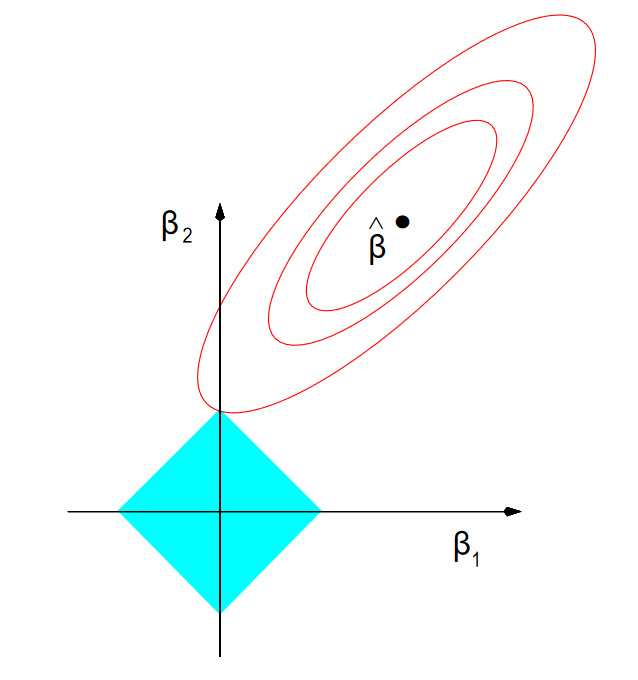

Okazuje się, że regresja LASSO przezwycięża dwa podstawowe problemy związane z regresją grzbietowa. 

Po pierwsze, kary nakładane na parametry są w tym wypadku stałe i nie zależą od oszacowanej wartości parametru $\hat{\beta}_i$. Dzięki temu model LASSO zachowuję relację pomiędzy zmiennymi, która jest wynikiem oszacowania za pomocą klasycznej metody najmniejszych kwadratów.

Po drugie, fakt, że ograniczenie nakładane w trakcie procesu jest kulą w metryce miejskiej powoduje, że funkcja błędu średniokwadratowego będzie relatywnie często stykała się z ograniczeniem w punkcie w którym któryś z parametrów będzie równy 0. Oznacza to, że regularyzacja $L_1$ jest w stanie selekcjonować parametry modelu, odrzucając te, których rola w predykcji jest niewielka. Dzięki temu jesteśmy w stanie uniknąć długiej i pracochłonnej procedury selekcji zmiennych do modelu.

Niestety regularyzacja $L_1$ nie jest metodą pozbawioną wad. Przede wszystkim fakt, że umożliwia automatyczną selekcję zmiennych może w niektórych sytuacjach być problematyczny. W jej wyniku możliwe jest wygenerowanie modelu, który jest całkowicie pozbawiony sensu i odrzuca zmienne, które są ważne w badanym problemie. W szczególności w przypadku w którym w modelu występują dwie (lub więcej) zmienne silnie współliniowe regresja LASSO losowo wybierze tylko jedną z nich.

Ponadto, w przypadku gdy mamy mniej obserwacji niż zmiennych objaśniających (gdy $n < k$) korzystając z regresji grzbietowej nadal jesteśmy w stanie oszacować działający model. Regresja LASSO w takiej sytuacji usunie większość zmiennych z modelu.

## Elastic Net

<b> Elastic Net</b> jest metodą, która strara się łączyć zalety obu typów regularyzacji przy możliwie największym ograniczeniu ich wad. Polega ona na oszacowaniu kombinacji liniowej obu metod:

$$\hat{\beta}^{Elastic} = \underset{\beta}{\operatorname{argmin}}\{\frac{1}{2}\sum_{i=1}^n(y_i - \beta_0 - \sum_{j-1}^k x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^k (\alpha|\beta_j| + (1-\alpha)\beta_j^2)\}$$

gdzie $\alpha \in (0,1)$

# Graficzna ocena klasyfikatorów

Zacznijmy od prostego przykładu. Dla australijskich danych dotyczących wniosków o karty kredytowe (dostepnych [tutaj](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat)) zbudujmy model orkreślający prawdopodobieństwo decyzji o odmowie wydania karty kredytowej. Zacznijmy od odpowiedniedgo przygotowania danych:

In [6]:
using DelimitedFiles
using PyPlot
using Statistics
using StatsBase
using DataFrames

In [7]:
isfile("australian.dat") ||
 download("http://archive.ics.uci.edu/ml/machine-learning-databases/
    statlog/australian/australian.dat")
rawdata = readdlm("australian.dat");

In [8]:
df = DataFrames.DataFrame(rawdata)
rename!(df,:x15 => :class)
df[:x4] = [x == 1 ? 1.0 : 0.0 for x in df[:x4]]
df[:x12] = [x == 1 ? 1.0 : 0.0 for x in df[:x12]]
df[:x14] = log.(df[:x14])
head(df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,22.08,11.46,0.0,4.0,4.0,1.585,0.0,0.0
2,0.0,22.67,7.0,0.0,8.0,4.0,0.165,0.0,0.0
3,0.0,29.58,1.75,1.0,4.0,4.0,1.25,0.0,0.0
4,0.0,21.67,11.5,1.0,5.0,3.0,0.0,1.0,1.0
5,1.0,20.17,8.17,0.0,6.0,4.0,1.96,1.0,1.0
6,0.0,15.83,0.585,0.0,8.0,8.0,1.5,1.0,1.0


In [9]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,x1,0.678261,0.0,1.0,1.0,,,Float64
2,x2,31.5682,13.75,28.625,80.25,,,Float64
3,x3,4.75872,0.0,2.75,28.0,,,Float64
4,x4,0.236232,0.0,0.0,1.0,,,Float64
5,x5,7.37246,1.0,8.0,14.0,,,Float64
6,x6,4.69275,1.0,4.0,9.0,,,Float64
7,x7,2.22341,0.0,1.0,28.5,,,Float64
8,x8,0.523188,0.0,1.0,1.0,,,Float64
9,x9,0.427536,0.0,0.0,1.0,,,Float64


In [10]:
countmap(df[:class])

Dict{Float64,Int64} with 2 entries:
  0.0 => 383
  1.0 => 307

Podzielmy zbiór na zbiory trenujący i testowy:

In [11]:
train_ratio = 0.7

0.7

In [12]:
train_set = df[1:floor(Int,size(df,1)*train_ratio),:];
test_set = df[floor(Int,size(df,1)*train_ratio + 1):end,:];

In [13]:
X_train = Matrix(train_set[:,1:end-1])';
X_test = Matrix(test_set[:,1:end-1])';
y_train = train_set[:class];
y_test = test_set[:class];

Znormalizujmy zmienne:

In [14]:
function scale(X)
    μ = mean(X, dims=2)
    σ = std(X, dims=2)

    X_norm = (X .- μ) ./ σ

    return (X_norm, μ, σ);
end

function scale(X, μ, σ)
    X_norm = (X .- μ) ./ σ
    return X_norm;
end

scale (generic function with 2 methods)

In [15]:
X_train, μ, σ = scale(X_train);

In [16]:
X_test = scale(X_test, μ, σ);

I zdefiniujmy funkcję szacującą regresję logistyczną, którą chcemy wyliczyć:

In [60]:
β = rand(1,size(X_train,1) + 1);

In [61]:
Predict(β, x) = 1 ./ (1 .+ exp.(-β[1:end-1]' * x .- β[end]))

Predict (generic function with 1 method)

In [62]:
L(ŷ, y) = (-y') * log.(ŷ') - (1 .- y') * log.(1 .- ŷ')

L (generic function with 1 method)

In [63]:
L₁(β) = sum(abs, β) 

L₁ (generic function with 1 method)

In [64]:
L₂(β) = sum(abs2, β) 

L₂ (generic function with 1 method)

Do rozwiązania zadanego problemu wykorzystamy [metodę gradientu prostego](https://pl.wikipedia.org/wiki/Metoda_gradientu_prostego). Zdefiniujmy funkcję, która wyznacza gradient:

In [65]:
function simple_∇(β, X, y,
        regularisation,λ)
    if isnothing(regularisation) || isnothing(λ)
        penalty = 0.0
    else
        penalty =  λ * regularisation(β[1:end-1])
    end
    J = L(Predict(β, X),y)[1] + penalty
    ∇ = Float64[]
    for i = 1:length(β)
        b = β[i]
        β′ = β .+ (LinearIndices(β) .== i) * b * √eps()
        β′′ = β .- (LinearIndices(β) .== i) * b * √eps()
        Δf = (L(Predict(β′,X),y)[1] - L(Predict(β′′,X),y)[1]) / (2*b*√eps())
        push!(∇,Δf)
    end
    return J, ∇
end

simple_∇ (generic function with 1 method)

In [66]:
simple_∇(β,X_train,y_train, nothing, nothing)

(366.3603339666306, [57.335649493125416, 26.696859953211654, 21.15483143350506, 68.19697486469373, -42.385749595737636, 15.842117709813104, 1.562263149590802, -71.95835901250601, -33.17102763525579, -20.760391962372665, 52.33861111047901, 30.605291874916425, 61.4043287175788, -16.058016378479298, 35.14580612534888])

Problematyczną kwestią jest sposób numerycznego liczenia pochodnych. Klasyczny sposób ich definiowania jest nieefektywny numerycznie. Koniecznie jest wykorzystanie [alternatywnych metod liczenia](http://www.juliadiff.org/). Niestety są one zazwyczaj trudne do samodzielnej implementacji i warto wtedy skorzystać z jednego z zaimplementowanych gdzie indziej rozwiązań.

In [67]:
function solve!(β, X, y;
            regularisation = nothing,
            λ = nothing,
            η = 0.001, ϵ = 10^-10, maxit = 50_000)
    iter = 1
    Js = Float64[]
    J, ∇ = simple_∇(β, X, y, regularisation, λ)
    push!(Js,J)
    while true
        β₀ = β
        β -= η * ∇'
        J, ∇ = simple_∇(β, X, y, regularisation, λ)
        push!(Js,J)
        stop = maximum(abs.(β .- β₀))
        stop < ϵ && break
        iter += 1
        iter > maxit && break
    end
    return Js
end

solve! (generic function with 1 method)

In [68]:
Js = solve!(β,X_train, y_train);

Sprawdźmy jak zachowywała się funkcja straty w czasie procesu uczenia:

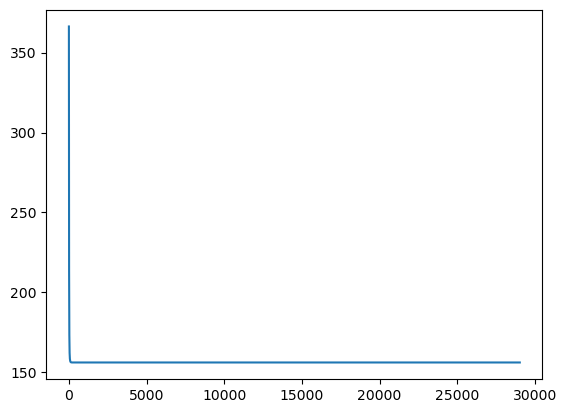

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002558910>

In [69]:
plot(Js)

I oczywiście dokonajmy oceny naszego klasyfikatora:

In [70]:
accuracy(β, X, y, T = 0.5) = sum((Predict(β, X)' .≥ T ).== y)/length(y)

accuracy (generic function with 2 methods)

In [71]:
function confusion_matrix(β, X, y, T = 0.5)
    ŷ = Predict(β, X)' .≥ T
    M = zeros(2,2)
    M[1,1] = sum(y[i] .== 1 && ŷ[i] .== 1 for i = 1:length(y))
    M[1,2] = sum(y[i] .== 0 && ŷ[i] .== 1 for i = 1:length(y))
    M[2,1] = sum(y[i] .== 1 && ŷ[i] .== 0 for i = 1:length(y))
    M[2,2] = sum(y[i] .== 0 && ŷ[i] .== 0 for i = 1:length(y))
    return M, accuracy(β, X, y, T)
end

confusion_matrix (generic function with 2 methods)

In [72]:
M, acc = confusion_matrix(β, X_test, y_test);

In [73]:
M

2×2 Array{Float64,2}:
 65.0  38.0
 26.0  79.0

In [74]:
acc

0.6923076923076923

Zajmijmy się teraz regresją LASSO. Spróbujmy wyznaczyć optymalną wielkość parametru $\lambda$:

In [75]:
λs = 0.0:0.01:1.0

0.0:0.01:1.0

In [51]:
accs = Float64[]
for λ in λs
    β_lasso = rand(1,size(X_train,1) + 1)
    _ = solve!(β_lasso,X_train, y_train,regularisation =  L₁,λ = λ, maxit = 10_000)
    push!(accs,accuracy(β_lasso, X_test, y_test)) 
end

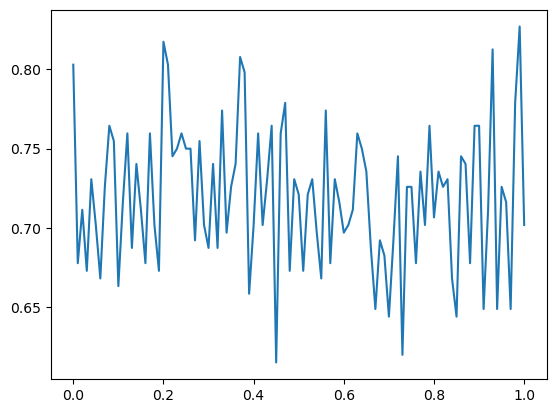

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002685C70>

In [52]:
plot(λs,accs)

Wyznaczmy optymalną wartość i oszacujmy dla niej jeszcze raz model:

In [53]:
λ_optim = λs[argmax(accs)]

0.99

In [54]:
β_lasso = rand(1,size(X_train,1) + 1)
_ = solve!(β_lasso,X_train, y_train,regularisation =  L₁,λ = λ_optim);

In [55]:
β

1×15 Array{Float64,2}:
 1.8698  -0.819611  -0.665642  0.753688  …  -0.741965  -1.07991  -0.195277

In [86]:
β_lasso

1×15 Array{Float64,2}:
 0.0444801  0.0445983  0.605079  0.113391  …  0.639737  0.466841  0.225741

In [57]:
M, acc = confusion_matrix(β_lasso, X_test, y_test);

In [58]:
M

2×2 Array{Float64,2}:
 73.0  24.0
 18.0  93.0

In [59]:
acc

0.7980769230769231

Przejdźmy teraz do omówienia graficznej oceny klasyfikatorów:

## Krzywa ROC

Krzywa ROC (<i>Receiver Operating Characteristic<i>) przedstawia uporządkowane pary $(FPR(T),TPR(T))$, gdzie $FPR(T)$ (<i>false positive rate</i>) oznacza stosunek liczby obserwacji fałszywie zaklasyfikowanych jako pozytywne do liczby naprawdę fałszywych obserwacji: $FPR(T) = \dfrac{\sum_{i=1}^{n}[p_i > T \land y_i =0]}{\sum_{i=1}{n} [y_i =0]}$. Wyrażenie $1-FPR(T)$ nazywamy też specyficznością (<i>specificity</i>) klasyfikatora.

Krzywą <i>ROC</i> tworzymy poprzez odkładanie na wykresie wyliczonych dla danego modelu wartości $(FPR(T),TPR(T))$ dla różnych $T \in (0,1)$.

Aby lepiej zrozumieć działanie krzywej ROC przedstawmy na wykresie 2 skrajności: model całkowicie losowy (<i>Random<i>) i model dosknonale prognozujący (<i>Wizard</i>):

In [76]:
function ROC()
    fig = figure("ROC");
    title("ROC curve")
    xlabel("False Positive Rate")
    ylabel("True Positive Rate")
    ax = gca()
    ax.set_xlim([-0.01,1.01])
    ax.set_ylim([-0.01,1.01])
    
    p = plot([0.0,1.0],[0.0,1.0],linestyle="--",marker="None",
    color= "Black", label="Random");
    
    p = plot([0.0,0.0],[0.0,1.0],linestyle="--",marker="None",
    color= "Red", label="Wizard");
    p = plot([0.0,1.0],[1.0,1.0],linestyle="--",marker="None",
    color= "Red");
    p = plot([0.0],[1.0],linestyle="--",marker="o",
    color= "Red");
    
    legend(loc="lower right") 
    
    return (fig, ax)
end

ROC (generic function with 2 methods)

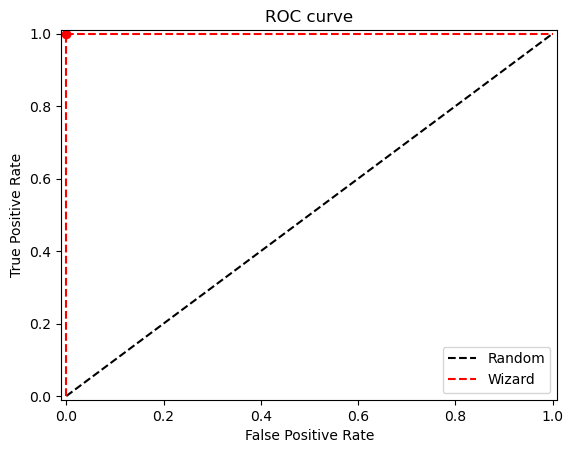

In [77]:
p = ROC();

Krzywa <i>Random</i>  ma zawsze równanie $TPR(T) = FPR(T)$. Krzywa <i>Wizard</i> jest de facto jednym punktem $(0,1)$ ($TPR(T) = 1$ i  $FPR(T) =0$).

Dodajmy do wykresu wartości dla oszacowań na zbiorze trenującym i zbiorze testowym dla wyliczonej poprzednio regresji LASSO:

In [78]:
function AUC(FPR,TPR)
    AUC = 0.0
    for i = 2:length(FPR)
        dx = FPR[i] - FPR[i-1]
        dy = TPR[i] - TPR[i-1]
        AUC += ((dx*TPR[i-1]) + (0.5*dx*dy))
    end
    -AUC
end

AUC (generic function with 1 method)

In [79]:
function ROC(β, X, y, plt, label)
    FPR = Float64[]
    TPR = Float64[]
    for T in 0.0:0.01:1.0
        M,_ = confusion_matrix(β, X, y, T)
        push!(FPR, M[1,2]/(M[1,2] + M[2,2]))
        push!(TPR, M[1,1]/(M[1,1] + M[2,1]))
    end
    
    fig, ax = plt
    ax.plot(FPR,TPR,linestyle="-",marker="None", label=label);
    ax.legend()
    return (fig, ax), AUC(FPR,TPR)
end

ROC (generic function with 2 methods)

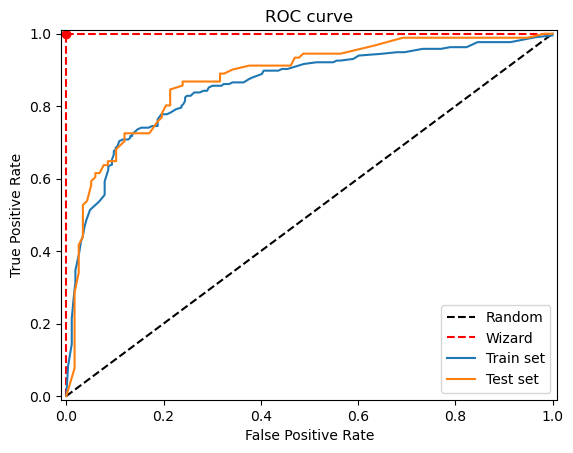

((Figure(PyObject <Figure size 640x480 with 1 Axes>), PyObject <AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>), 0.8761153376537993)

In [80]:
p = ROC()
p,_ = ROC(β_lasso,X_train,y_train, p, "Train set")
p,_ = ROC(β_lasso,X_test,y_test, p, "Test set")

Możemy też porównać ze sobą wyniki otrzymane przez oba oszacowane modele:

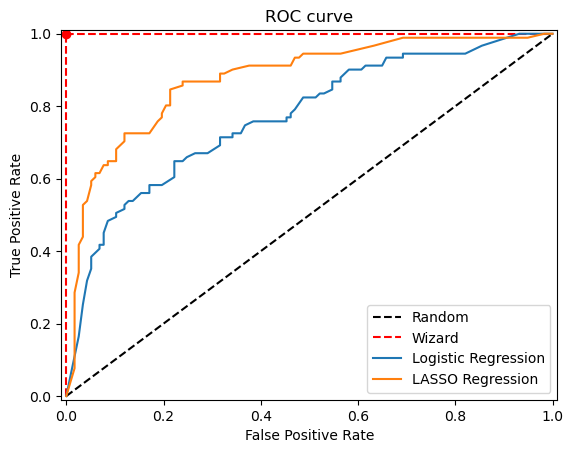

((Figure(PyObject <Figure size 640x480 with 1 Axes>), PyObject <AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>), 0.8761153376537993)

In [81]:
p = ROC()
p,_ = ROC(β,X_test,y_test, p, "Logistic Regression")
p,_ = ROC(β_lasso,X_test,y_test, p, "LASSO Regression")

Wyboru modelu dokonujemy poprzez znalezienie takiego, którego przebieg jest jak najbardziej zbliżony do modelu <i>Wizard</i>. Analogicznie oceniamy też różnice w predykcji modelu pomiędzy zbiorem testowym i zbiorem trenującym.

Ważnym i często wykorzystywanym narzędziem oceny jakości modelu, które wynika bezpośrednio z przebiegu krzywej <i>ROC</i> jest pole powierzchni pod tą krzywą <i>AUC</i> (<i>area under curve</i>). Pozwala ona ocenić jaka jest jakość predykcji modeli niezależnie od wybranego $T$. Dla modelu <i>Wizard</i> pole jest zawsze równe 1 dla modelu <i>Random</i> 0.5. Oszacujmy <i>AUC</i>:

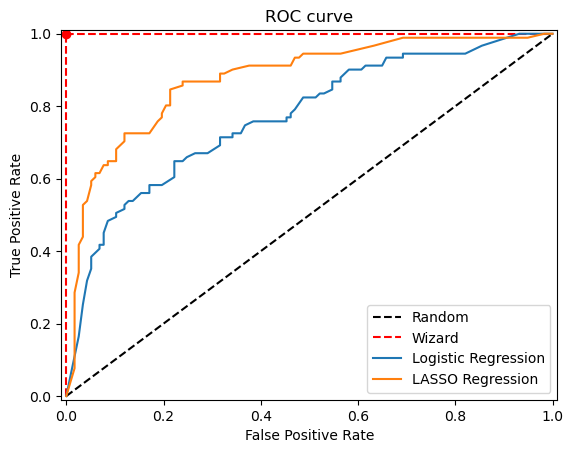

((Figure(PyObject <Figure size 640x480 with 1 Axes>), PyObject <AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>), 0.8761153376537993)

In [82]:
p = ROC()
_,auc = ROC(β,X_test,y_test, p, "Logistic Regression")
_,auc_lasso = ROC(β_lasso,X_test,y_test, p, "LASSO Regression")

In [83]:
auc

0.769935193012116

In [84]:
auc_lasso

0.8761153376537993

Ponadto krzywa <i>ROC</i> pozwala na wybór odpowiedniego progu odcięcia $T$. Gdy z góry nic nie zakładamy na jego temat potencjalnym wyborem jest ten gdzie czułość jest równa specyficzności $TPR(T) = 1 - FPR(T)$. Szukamy odpowiedniego punktu na wykresie i odczytujemy wartość. 

Na podstawie krzywej <i>ROC</i> możliwa jest też optymalizacja progu. 

Jak wiemy najlepszy możliwy model to taki, który jest możliwie jak najblżej punktu $(0,1)$. Szukamy więc takiej wartości progu odcięcia, która minimalizuje odległość modelu od tego punktu.

Możliwe jest też wyznaczenie tego w odwrotny sposób - szukając modelu najmocniej oddalonego od krzywej <i>Random</i>. Wykorzystujemy do tego <b>indeks J Youdena</b>:

[![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/ROC_Curve_Youden_J.png/330px-ROC_Curve_Youden_J.png)](https://en.wikipedia.org/wiki/Youden%27s_J_statistic)

i wyznaczamy ze wzoru:
$$J = czułość + specyficzność - TPR  + TNR - 1$$

## Co dalej?

W ramach dzisiejszego prostego przykładu pokazaliśmy sobie to w jaki sposób można budować modele predykcyjne wykorzystując do tego najbardziej podstawowe narzędzia wbudowane w Julię. W celu poszerzenia swojej wiedzy 
Aby być jednak w stanie budować bardziej złożone modele potrzebować będziemy odpowiednich bibliotek ułatwiających nam pracę, między innymi: 

###  1. DataFrames.jl

Biblioteka [<tt>DataFrames</tt>](https://juliadata.github.io/DataFrames.jl/stable/man/getting_started.html) jest narzędziem pozwalającym na efektywną i wygodną pracę ze zbiorami danych. Jest implementacja znanych z <tt>R</tt> ramek danych, oferując wszystkie znane z <tt>R</tt> narzędzia, zaimplementowane w wyraźnie efektywniejszy obliczeniowo sposób. Warto zapoznać się ze szczegółowym [wprowadzeniem do <tt>DataFrames</tt> ](https://github.com/bkamins/Julia-DataFrames-Tutorial).

### 2. Plots.jl

[Plots]() to podstawowa bibliotka do tworzenia wykresów w Julii. Jedną z jej głównych zalet jest to, że pozwala na wykorzystanie wielu [backendów](http://docs.juliaplots.org/latest/backends/). Warto zapoznać się z [dokumenacją](http://docs.juliaplots.org/latest/) tej biblioteki.

### 3. Flux.jl

W celu zapoznania się z działaniem biblioteki <tt>Flux</tt> warto zajrzeć do jej [dokumentacji](https://fluxml.ai/Flux.jl/stable/) i zapoznać się z załączonym do dzisiejszych notatek skryptem.

## Literatura 

Poza wymienioną powyżej literaturą wprowadzającą do specyficznych zagadnień potrzebnych podczas tego kursu istenieje wiele dodatkowych przydatnych źródeł pozwalających rozwinąć swoją wiedzę na temat programowania w Julii:
- [Podręcznik Boyda i Vandenberghe](http://vmls-book.stanford.edu/)
- [Julia Express](https://github.com/bkamins/The-Julia-Express)
- [wykłady Quantitative Economics Sargenta i Stachurskiego](https://lectures.quantecon.org/jl/)
- [Julia dla Data Science](http://ucidatascienceinitiative.github.io/IntroToJulia/)
- [Think Julia](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html)
- [materiały dostępne na stronie języka](https://julialang.org/learning/)

## Dodatkowe prace domowe

1. Przepisz zaprezentowaną powyżej implementację klasycznej metody najmniejszych kwadratów na języki <tt>Python</tt> i <tt>R</tt>. Wykorzystaj do tego dane dostępne [tutaj](https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/bostonc.csv), czyli [klasyczny zbiór dotyczący cen domów w Bostonie](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), jako zmienną objaśnianą wykorzystaj cenę domu. Porównaj czasy rozwiązania problemu w różnych językach. Pamiętaj o tym żeby nie korzystać ze zbyt wielu bibliotek!

2. Przeprowadziliśmy procedurę wyboru najlepszego modelu dla regresji LASSO. Przeprowadź taką samą analizę dla regresji grzbietowej i modelu Elastic-Net. Który z modeli jest najlepszy? Odpowiedź uzasadnij. 
